<b> Exploratory Data Analysis </b>

In [228]:
import sys
print(sys.version)
import pandas as pd
import numpy as np 
import warnings 
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

3.10.11 | packaged by Anaconda, Inc. | (main, Apr 20 2023, 18:56:50) [MSC v.1916 64 bit (AMD64)]


In [188]:
df=pd.read_csv("fruitvegprices-2017_2022.csv")

df.head(10)

,category,item,variety,date,price,unit
0,fruit,apples,bramleys_seedling,2022-03-11,2.05,kg
1,fruit,apples,coxs_orange_group,2022-03-11,1.22,kg
2,fruit,apples,egremont_russet,2022-03-11,1.14,kg
3,fruit,apples,braeburn,2022-03-11,1.05,kg
4,fruit,apples,gala,2022-03-11,1.03,kg
5,fruit,apples,other_late_season,2022-03-11,0.85,kg
6,fruit,pears,conference,2022-03-11,0.77,kg
7,fruit,pears,doyenne_du_comice,2022-03-11,1.24,kg
8,vegetable,beetroot,beetroot,2022-03-11,0.52,kg
9,vegetable,brussels_sprouts,brussels_sprouts,2022-03-11,0.78,kg


In [189]:
df.info

<bound method DataFrame.info of          category           item            variety        date  price  unit
0           fruit         apples  bramleys_seedling  2022-03-11   2.05    kg
1           fruit         apples  coxs_orange_group  2022-03-11   1.22    kg
2           fruit         apples    egremont_russet  2022-03-11   1.14    kg
3           fruit         apples           braeburn  2022-03-11   1.05    kg
4           fruit         apples               gala  2022-03-11   1.03    kg
...           ...            ...                ...         ...    ...   ...
9642  cut_flowers    alstromeria             indoor  2017-11-03   0.27  stem
9643  cut_flowers  chrysanthemum       indoor_spray  2017-11-03   0.22  stem
9644  cut_flowers        lillies           oriental  2017-11-03   0.70  stem
9645  cut_flowers      narcissus             indoor  2017-11-03   0.06  stem
9646   pot_plants       cyclamen              13_cm  2017-11-03   0.75  unit

[9647 rows x 6 columns]>

In [190]:
df.shape

(9647, 6)

In [191]:
df.dtypes

category     object
item         object
variety      object
date         object
price       float64
unit         object
dtype: object

In [192]:
df.columns

Index(['category', 'item', 'variety', 'date', 'price', 'unit'], dtype='object')

In [193]:
df['category'].value_counts()

vegetable      7264
fruit          1992
cut_flowers     342
pot_plants       49
Name: category, dtype: int64

In [113]:
df['item'].value_counts()

apples                  1077
cabbage                 1005
lettuce                  666
onion                    543
tomatoes                 445
pears                    312
capsicum                 303
rhubarb                  235
beans                    230
spring_greens            218
cauliflower              218
celeriac                 218
beetroot                 218
pak_choi                 218
curly_kale               217
carrots                  214
swede                    212
parsnips                 211
leeks                    208
turnip                   193
cucumbers                164
brussels_sprouts         143
strawberries             138
coriander                131
spinach_leaf             129
celery                   124
calabrese                116
mixed_babyleaf_salad     115
rocket                   109
raspberries              101
tulips                    97
watercress                92
chinese_leaf              86
courgettes                81
plums         

<b> Data Preprocesing </b>

In [194]:
df["date"].dtype

dtype('O')

In [195]:
# converting column "date" into date type

df["date"]=pd.to_datetime(df["date"])

In [100]:
df["date"].dtype

dtype('<M8[ns]')

In [196]:
# setting date as index

df=df.set_index("date")

In [197]:
df

,category,item,variety,price,unit
date,,,,,
2022-03-11,fruit,apples,bramleys_seedling,2.05,kg
2022-03-11,fruit,apples,coxs_orange_group,1.22,kg
2022-03-11,fruit,apples,egremont_russet,1.14,kg
2022-03-11,fruit,apples,braeburn,1.05,kg
2022-03-11,fruit,apples,gala,1.03,kg
...,...,...,...,...,...
2017-11-03,cut_flowers,alstromeria,indoor,0.27,stem
2017-11-03,cut_flowers,chrysanthemum,indoor_spray,0.22,stem
2017-11-03,cut_flowers,lillies,oriental,0.70,stem


In [198]:
# sorting index from 2017 to 2022 ASC order

df=df.sort_index()

In [199]:
df

,category,item,variety,price,unit
date,,,,,
2017-11-03,pot_plants,cyclamen,13_cm,0.75,unit
2017-11-03,vegetable,capsicum,green,0.62,kg
2017-11-03,vegetable,calabrese,calabrese,1.07,kg
2017-11-03,vegetable,cabbage,round_green_other,0.39,head
2017-11-03,vegetable,cabbage,white,0.34,kg
...,...,...,...,...,...
2022-03-11,vegetable,rhubarb,forced,4.35,kg
2022-03-11,vegetable,rhubarb,outdoor,3.07,kg
2022-03-11,cut_flowers,tulips,tulips,0.29,stem


In [201]:
# searching for most often sold item

item_counts = df['item'].value_counts()

most_common_item = item_counts.idxmax()


most_common_item_count = item_counts.max()

print("Most Common Item:", most_common_item)
print("Sold:", most_common_item_count)

# Apples been in most demand during 2017-2019

Most Common Item: apples
Sold: 1077


In [217]:
# searching for least often sold item


item_counts = df['item'].value_counts()

least_item = item_counts.idxmin()


least_count = item_counts.min()

print("Low frequency Item:", least_item)
print("Sold:", least_count)

Low frequency Item: sweet_williams
Sold: 6


In [214]:
# calculating vegetable counts

veg_df = df[df["category"] == "vegetable"]
veg_df

# 7264 records of vegetables has been noted
# veg_df["item"].value_counts().sum()

,category,item,variety,price,unit
date,,,,,
2017-11-03,vegetable,capsicum,green,0.62,kg
2017-11-03,vegetable,calabrese,calabrese,1.07,kg
2017-11-03,vegetable,cabbage,round_green_other,0.39,head
2017-11-03,vegetable,cabbage,white,0.34,kg
2017-11-03,vegetable,cabbage,summer_autumn_pointed,0.49,kg
...,...,...,...,...,...
2022-03-11,vegetable,turnip,turnip,0.63,kg
2022-03-11,vegetable,parsnips,all_varieties,1.00,kg
2022-03-11,vegetable,rhubarb,forced,4.35,kg


In [205]:
# calculating fruit counts

fruit_df = df[df["category"] == "fruit"]
fruit_df

# 1992 records of fruits has been noted
# fruit_df["item"].value_counts().sum()

,category,item,variety,price,unit
date,,,,,
2017-11-03,fruit,raspberries,raspberries,11.00,kg
2017-11-03,fruit,pears,other,0.54,kg
2017-11-03,fruit,pears,doyenne_du_comice,0.78,kg
2017-11-03,fruit,pears,conference,0.70,kg
2017-11-03,fruit,apples,other_late_season,0.75,kg
...,...,...,...,...,...
2022-03-11,fruit,apples,braeburn,1.05,kg
2022-03-11,fruit,apples,egremont_russet,1.14,kg
2022-03-11,fruit,apples,coxs_orange_group,1.22,kg


In [222]:
# calculating cut flowers counts

flower_df = df[df["category"] == "cut_flowers"]
flower_df

# 342 records of cut flowers has been noted
# flower_df["item"].value_counts().sum()

,category,item,variety,price,unit
date,,,,,
2017-11-03,cut_flowers,narcissus,indoor,0.06,stem
2017-11-03,cut_flowers,lillies,oriental,0.70,stem
2017-11-03,cut_flowers,chrysanthemum,indoor_spray,0.22,stem
2017-11-03,cut_flowers,alstromeria,indoor,0.27,stem
2017-11-10,cut_flowers,narcissus,indoor,0.06,stem
...,...,...,...,...,...
2022-02-11,cut_flowers,tulips,tulips,0.27,stem
2022-02-18,cut_flowers,tulips,tulips,0.28,stem
2022-02-25,cut_flowers,tulips,tulips,0.28,stem


In [227]:
# calculating plants counts

plants_df = df[df["category"] == "pot_plants"]
plants_df

plants_df["item"].value_counts().sum()
# 49 records of plants has been noted

49

In [119]:
# grouping data and dividing weekly

aggregation_functions={'price':'mean'}
df_weekly_average_price=df.groupby(['category','item','variety','unit']).resample("W",origin='2017-11-03').aggregate(aggregation_functions).reset_index().rename(columns={'price': 'weekly_average_price'})
df_weekly_average_price

,category,item,variety,unit,date,weekly_average_price
0,cut_flowers,alstromeria,indoor,stem,2017-11-05,0.27
1,cut_flowers,alstromeria,indoor,stem,2017-11-12,0.26
2,cut_flowers,alstromeria,indoor,stem,2017-11-19,0.27
3,cut_flowers,alstromeria,indoor,stem,2017-11-26,0.28
4,cut_flowers,alstromeria,indoor,stem,2017-12-03,0.29
...,...,...,...,...,...,...
15585,vegetable,watercress,pillow_packs,kg,2019-08-04,9.50
15586,vegetable,watercress,pillow_packs,kg,2019-08-11,10.08
15587,vegetable,watercress,pillow_packs,kg,2019-08-18,9.94
15588,vegetable,watercress,pillow_packs,kg,2019-08-25,10.16


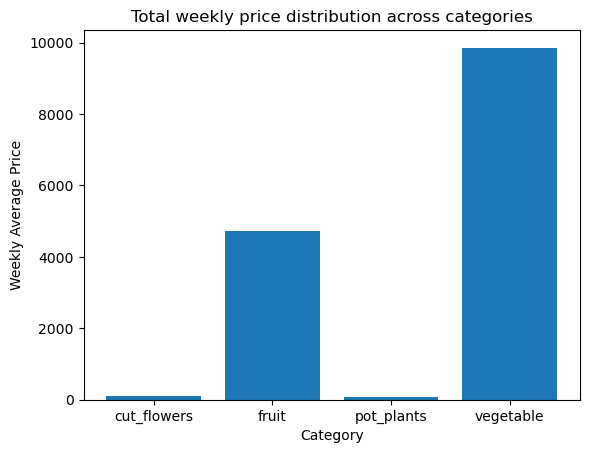

In [144]:
# Total weekly distribution across categories

category_means = df_weekly_average_price.groupby('category')['weekly_average_price'].sum()

plt.bar(category_means.index, category_means)

plt.xlabel("Category")
plt.ylabel("Weekly Average Price")
plt.title("Total weekly price distribution across categories")


plt.show()

# 

In [142]:
# grouping data and dividing monthly

aggregation_functions={'price':'mean'}
df_monthly_average_price = df.groupby(['category', 'item', 'variety', 'unit']).resample("M", origin= '2017-11-03').aggregate(aggregation_functions).reset_index().rename(columns={'price':'monthly_average_price'})
df_monthly_average_price

,category,item,variety,unit,date,monthly_average_price
0,cut_flowers,alstromeria,indoor,stem,2017-11-30,0.2700
1,cut_flowers,alstromeria,indoor,stem,2017-12-31,0.2800
2,cut_flowers,alstromeria,indoor,stem,2018-01-31,0.3100
3,cut_flowers,alstromeria,indoor,stem,2018-02-28,0.3275
4,cut_flowers,alstromeria,indoor,stem,2018-03-31,0.3040
...,...,...,...,...,...,...
3629,vegetable,watercress,pillow_packs,kg,2019-04-30,9.4750
3630,vegetable,watercress,pillow_packs,kg,2019-05-31,9.5000
3631,vegetable,watercress,pillow_packs,kg,2019-06-30,9.4900
3632,vegetable,watercress,pillow_packs,kg,2019-07-31,9.4975


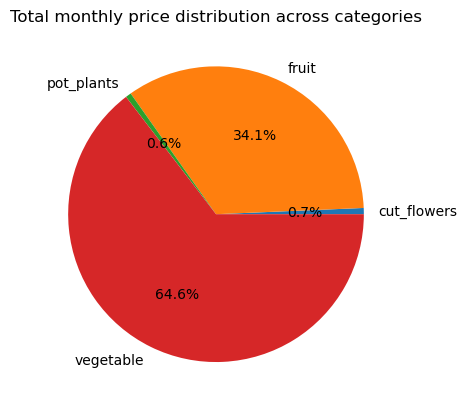

In [143]:
# Total monthly price distribution across categories

category_totals = df_monthly_average_price.groupby('category')['monthly_average_price'].sum()


plt.pie(category_totals, labels=category_totals.index, autopct='%1.1f%%')
plt.title("Total monthly price distribution across categories")

plt.show()
